# Projeto DIVINO
## Regressão Logística

#### Load Data and Preparation

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from ipynb.fs.full.data_analiser import *
from ipynb.fs.full.wine_functions import *

pd.set_option("display.precision", 2)
modelDescription = 'Árvore de Decisão'

In [2]:
# Load Data
data = load_data(True);
target_variable, classifier_variables, classes = get_target_and_classifier_and_classes_variables(data)
classifier_variables

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

### Validação Cruzada

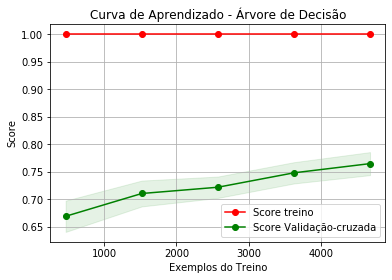

In [3]:
Xtrain, Xtest, Ytrain, Ytest, cvfold = validacao_cruzada(data, target_variable, classifier_variables)
scorer = metrics.make_scorer(metrics.accuracy_score)
estimator = tree.DecisionTreeClassifier(criterion='entropy')
exibir_curva_de_aprendizado(modelDescription, estimator, scorer, Xtrain, Ytrain, cvfold)

### Treinando o Modelo

In [4]:
model_pipe = treinar_modelo(StandardScaler(), estimator, Xtrain, Ytrain)
model_pipe

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Model',
                 DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

### Aplicação do Modelo na Massa de Teste

In [5]:
Yhat, Ypred = aplicar_modelo(model_pipe, Xtest)

Yhat.shape: (1300,)


### Distribuição:

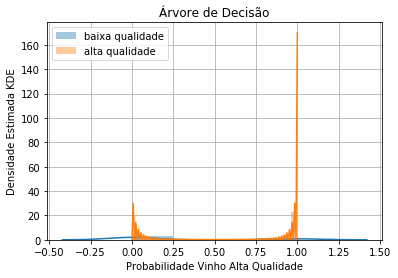

In [6]:
exibir_distribuicao(modelDescription, classes, Yhat, Ytest)

### Curva ROC

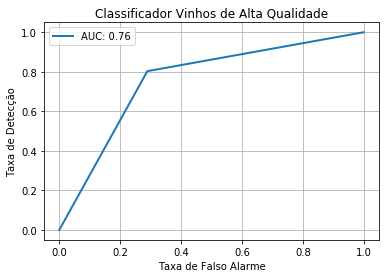

In [7]:
exibirCurvaRoc('Classificador Vinhos de Alta Qualidade', Ytest, Yhat)

### Matriz de Confusão

In [8]:
exibirMatrixDeConfusao(Ytest, Ypred, classes)

,Model baixa qualidade,Model alta qualidade,Real Total
Real baixa qualidade,339,138,477
Real alta qualidade,162,661,823
Model Total,501,799,1300


### Classification Report 

In [9]:
print(metrics.classification_report(Ytest, Ypred, target_names=classes))

                 precision    recall  f1-score   support

baixa qualidade       0.68      0.71      0.69       477
 alta qualidade       0.83      0.80      0.82       823

       accuracy                           0.77      1300
      macro avg       0.75      0.76      0.75      1300
   weighted avg       0.77      0.77      0.77      1300

